In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageDraw
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "text.color": text_color,
        "font.family": font_family,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

In [3]:
font_family = "PT Mono"
background_color = "#FAF0F1"
text_color = "#080520"
grid_color = "#E4C9C9"

set_seaborn_style(font_family, background_color, grid_color, text_color)

In [4]:
def create_rankings(df, columns):
    rank_columns = ["rank_{}".format(i) for i in range(len(columns))]
    for i, column in enumerate(columns):
        df[rank_columns[i]] = df[column].rank(ascending=False)
        
    return df, rank_columns

In [5]:
def format_ticks(ax, years, padx=0.25, pady=0.5, y_label_size=20, x_label_size=24):
    ax.set(xlim=(-padx, len(years) -1 + padx), ylim=(-len(df) - pady, - pady))
    
    xticks = [i for i in range(len(years))]
    ax.set_xticks(ticks=xticks, labels=years)

    yticks = [-i for i in range(1, len(df) + 1)]
    ylabels = ["{}".format(i) for i in range(1, len(df) + 1)]
    ax.set_yticks(ticks=yticks, labels=ylabels)
    
    ax.tick_params("y",labelsize=y_label_size, pad=16)
    ax.tick_params("x", labeltop=True, labelsize=x_label_size, pad=8)

In [6]:
def add_line(ax, row, columns):
    x = [i for i in range(len(columns))]
    y = [-row[rc] for rc in columns]
    
    ax.add_artist(
        Line2D(x, y, linewidth=3, color=text_color)
    )

In [7]:
def add_pie_and_flag(ax, x, y, name, ratio, size=572, zoom=0.1):
    flag = Image.open("<location>/{}.png".format(name.lower()))
    image = Image.new('RGBA', (size, size))
    draw = ImageDraw.Draw(image)
    pad = int((size - 512) / 2)
    
    draw.pieslice((0, 0, size, size), start=-90, end=360*ratio-90, fill=text_color, outline=text_color)
    image.paste(flag, (pad, pad), flag.split()[-1])
    
    im = OffsetImage(image, zoom=zoom, interpolation="lanczos", resample=True, visible=True)

    ax.add_artist(AnnotationBbox(
        im, (x, y), frameon=False,
        xycoords="data",
    ))

In [8]:
def add_text(ax, value, max_value, y):
    trillions = round(value / 1e12, 1)
    ratio_to_max = round(100 * value / max_value, 1)
    
    text = "{}\n${:,}T ({}%)".format(
        row.country_name, 
        trillions,
        ratio_to_max
    )
            
    ax.annotate(
        text, (1.03, y), 
        fontsize=20,
        linespacing=1.7,
        va="center",
        xycoords=("axes fraction", "data")
    )

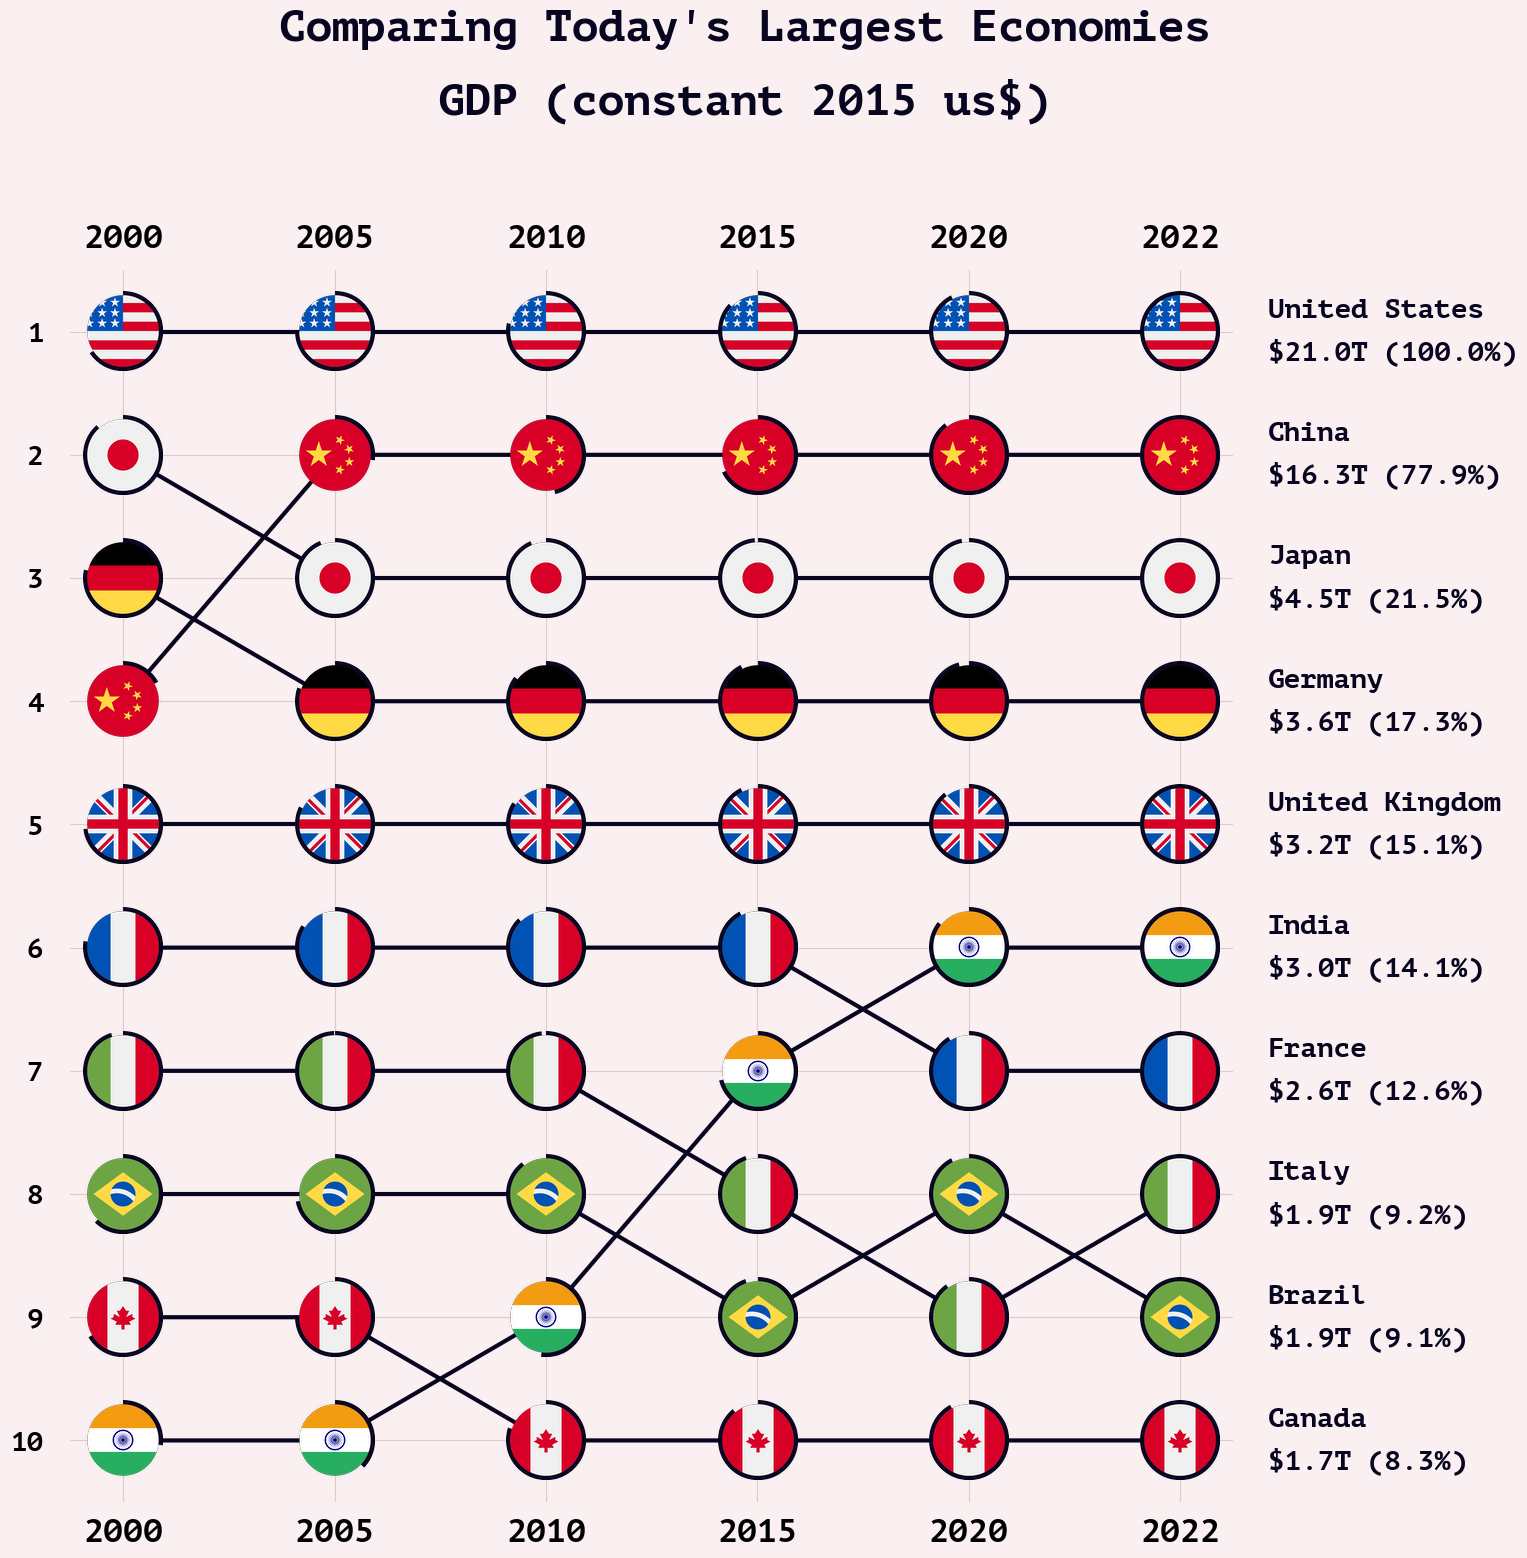

In [9]:
years = ["2000", "2005", "2010", "2015", "2020", "2022"]
df = pd.read_csv("rankings.csv", index_col=None)
df, rank_columns = create_rankings(df, years)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1.6*len(df)))
format_ticks(ax, years)

for i, row in df.iterrows():
    add_line(ax, row, rank_columns)
    
    for j, rc in enumerate(rank_columns):
        add_pie_and_flag(
            ax, j, -row[rc], 
            name=row.country_name,
            ratio=row[years[j]] / row[years].max()
        )
        
    add_text(ax, value=row[years[-1]], max_value=df.iloc[0][years[-1]], y=-(i + 1))
    plt.title("Comparing Today's Largest Economies\nGDP (constant 2015 us$)", linespacing=1.8, fontsize=32, x=0.58, y=1.12)
    

In [11]:
df[["country_name"] + rank_columns]

,country_name,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5
0,United States,1.0,1.0,1.0,1.0,1.0,1.0
1,China,4.0,2.0,2.0,2.0,2.0,2.0
2,Japan,2.0,3.0,3.0,3.0,3.0,3.0
3,Germany,3.0,4.0,4.0,4.0,4.0,4.0
4,United Kingdom,5.0,5.0,5.0,5.0,5.0,5.0
5,India,10.0,10.0,9.0,7.0,6.0,6.0
6,France,6.0,6.0,6.0,6.0,7.0,7.0
7,Italy,7.0,7.0,7.0,8.0,9.0,8.0
8,Brazil,8.0,8.0,8.0,9.0,8.0,9.0
9,Canada,9.0,9.0,10.0,10.0,10.0,10.0
